# Reporte de MLT de Barcelona Telco

## Problema ha solucionar


## Data

In [28]:
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Wine/winequality-red.csv',header=0,sep=',')
print(df.shape)

(1599, 12)


In [30]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

## Data Exploration

In [31]:
df.isnull().values.any()

False

In [32]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [33]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

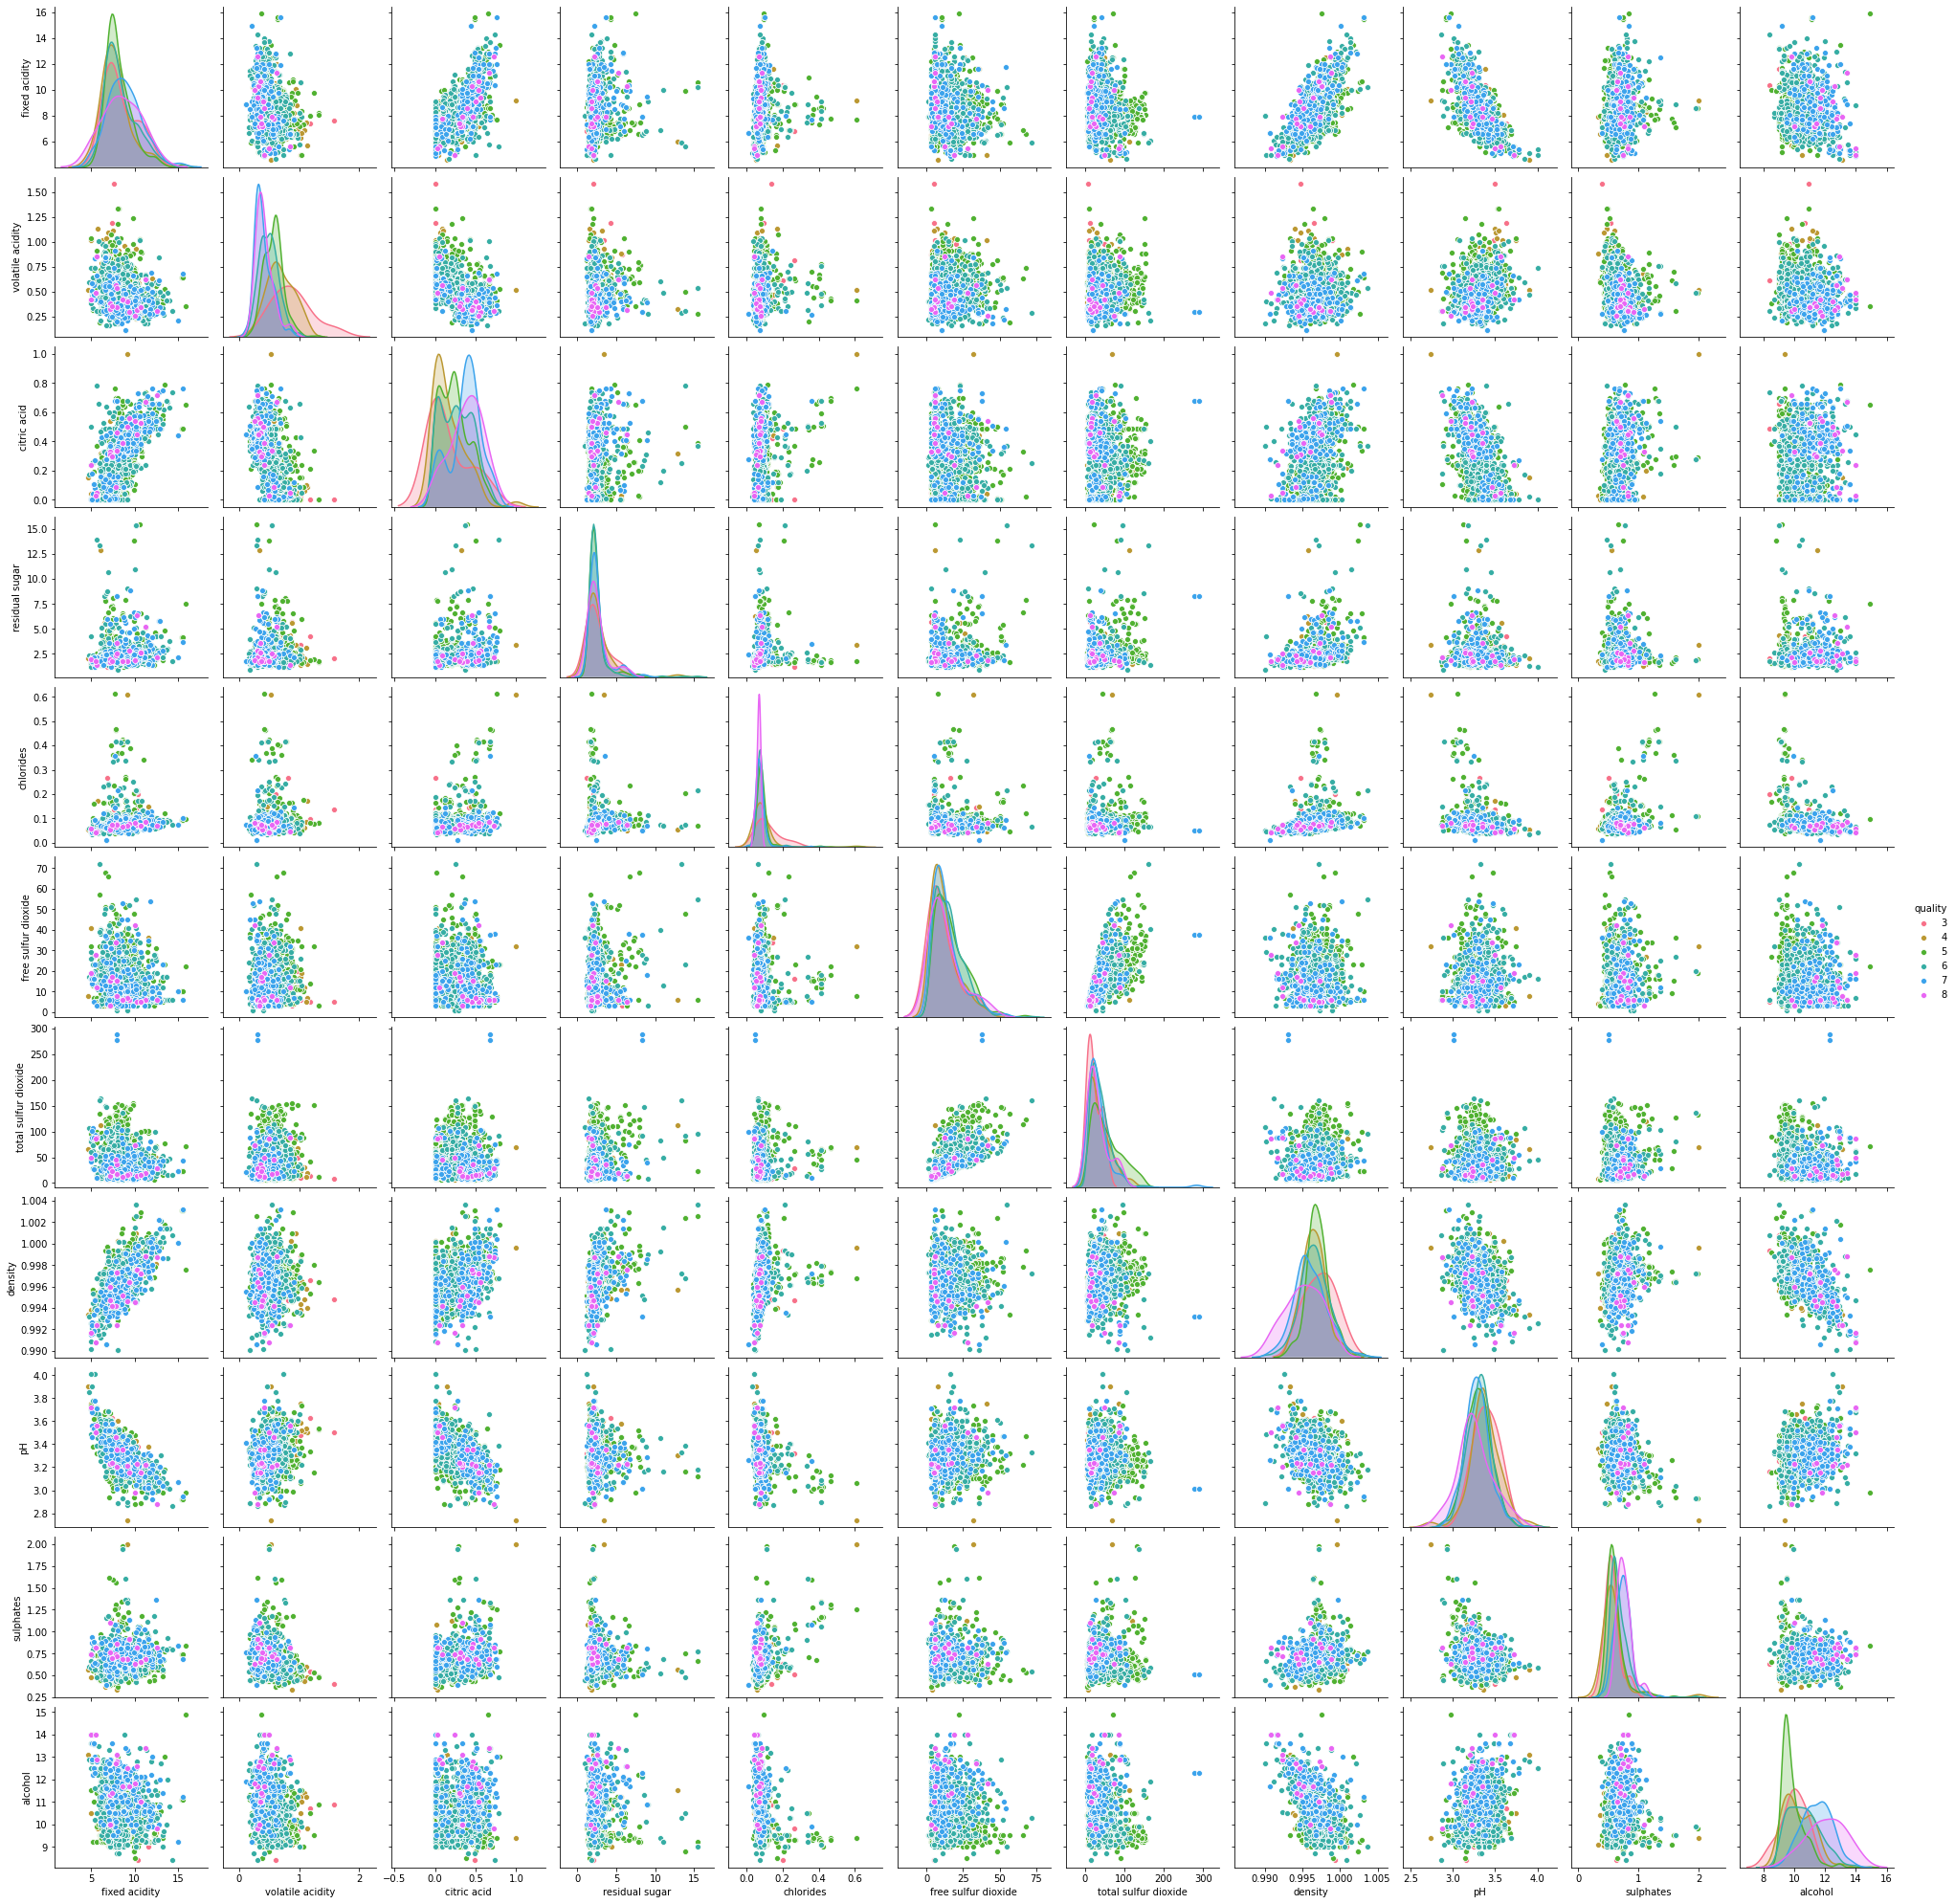

In [16]:
sns.pairplot(df, hue="quality", palette="husl")

## Algoritmo de Machine Learning

In [34]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Y = df['quality']
data = df.drop(['quality'],axis=1)
X = data.values

X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9,random_state=30)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)

(1439, 11)
(160, 11)


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report

RFC = RandomForestClassifier(max_depth = 10, min_samples_split = 8, n_estimators = 3000,random_state = 15, n_jobs = -1)
RFC.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

### AutoML

In [35]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [38]:
import autosklearn.classification
import sklearn.model_selection


automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=1200, 
          per_run_time_limit=300,
          )
automl.fit(x_train, y_train)
print(automl.show_models())

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, metric=None,
                      ml_memory_limit=3072, n_jobs=None, output_folder=None,
                      per_run_time_limit=300, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=1200,

## Resultados

### Random Forest

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

train_prediction = RFC.predict(x_train)
print("La accuracy train es de {}.".format(accuracy_score(y_train,train_prediction)))
print(classification_report(y_train, train_prediction))
score_train = RFC.score(x_train,y_train)
print('Score train: {}'.format(score_train))

test_prediction = RFC.predict(x_test)
print("La accuracy test es de {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_test, test_prediction))
score_test = RFC.score(x_train,y_train)
print('Score test: {}'.format(score_test))

La accuracy train es de 0.8832522585128562.
              precision    recall  f1-score   support

           3       1.00      0.22      0.36         9
           4       1.00      0.32      0.48        47
           5       0.88      0.94      0.91       618
           6       0.87      0.92      0.89       579
           7       0.95      0.80      0.87       172
           8       1.00      0.07      0.13        14

    accuracy                           0.88      1439
   macro avg       0.95      0.55      0.61      1439
weighted avg       0.89      0.88      0.87      1439

Score: 0.8832522585128562
La accuracy test es de 0.61875.
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.65      0.79      0.71        63
           6       0.54      0.61      0.57        59
           7       0.81      0.48      0.60        27
           8       0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score: 0.8832522585128562


### AutoML

In [43]:
y_predict = automl.predict(x_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_predict)

print("Test Accuracy score {0}".format(test_acc))
print(automl.sprint_statistics())

Test Accuracy score 0.63125
auto-sklearn results:
  Dataset name: d78fd24be113eb7225c7d7c04d61ae57
  Metric: accuracy
  Best validation score: 0.673684
  Number of target algorithm runs: 178
  Number of successful target algorithm runs: 163
  Number of crashed target algorithm runs: 7
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 7



 ## Discusión y Conclusiones

## Linias de desarrollo futuro

### Annexo 1 : Guardar y/o cargar el modelo


In [47]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [48]:
#import joblib
#filename = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_Wine_AutoIML.pkl'
#joblib.dump(automl, filename)

['/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_Wine_AutoIML.pkl']

In [ ]:
#joblib.load(automl,filename)

### Annexo 2 : Ejemplo

In [ ]:
print("Los valores de {} son max: {} i min: {}".format(df.columns[0], df[df.columns[0]].max(), df[df.columns[0]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[1], df[df.columns[1]].max(), df[df.columns[1]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[2], df[df.columns[2]].max(), df[df.columns[2]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[3], df[df.columns[3]].max(), df[df.columns[3]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[4], df[df.columns[4]].max(), df[df.columns[4]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[5], df[df.columns[5]].max(), df[df.columns[5]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[6], df[df.columns[6]].max(), df[df.columns[6]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[7], df[df.columns[7]].max(), df[df.columns[7]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[8], df[df.columns[8]].max(), df[df.columns[8]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[9], df[df.columns[9]].max(), df[df.columns[9]].min()))
print("Los valores de {} son max: {} i min: {}".format(df.columns[10], df[df.columns[10]].max(), df[df.columns[10]].min()))

In [ ]:
fixedAcidity = 5
volatileAcidity = 0.12
citricAcid = 0.25
residualSugar = 2
chlorides = 0.3
freeSulfurDioxide = 25
totalSulfurDioxide = 10
density = 1
pH = 3.3
sulphates = 0.62
alcohol = 10.5
datosEjemplo = np.array([fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol])

In [ ]:
datosNuevos = datosEjemplo.reshape(1,-1)
#automl_wine = joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_Wine_AutoIML.pkl')
score = automl.score(x_test,y_test)
print("Test score: {0:.2f} %".format(100 * score))
#print(automl_wine.sprint_statistics())
#print(automl_wine.show_models())
qualityEsperada = automl_wine.predict(datosNuevos)
print(qualityEsperada)

In [ ]:
datosNuevos = datosFerran.reshape(1,-1)
qualityEsperada = RFC.predict(datosNuevos)
score = RFC.score(x_test,y_test)
print("Test score: {0:.2f} %".format(100 * score))
print(qualityEsperada)

### Annexo 3 : Interfície CEO

imlpython.westeurope.cloudapp.azure.com:1880/ui